In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import pickle

In [2]:
try:
    df = pd.read_pickle('df.p')
    print('loaded pickled DF')
except:
    print('generating DF from MTA site')
    df1 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_200822.txt')
    # 8/15 to 8/21
    df2 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_200829.txt')
    #8/22 to 8/28
    df3 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_200905.txt')
    #8/29 to 9/04
    df4 = pd.read_csv('http://web.mta.info/developers/data/nyct/turnstile/turnstile_200912.txt')
    #9/05 to 9/11
    
    #each df is one week (saturday to friday)
    df = pd.concat([df1, df2, df3, df4])
    pickle.dump(df, open('df.p','wb'))

loaded pickled DF


In [3]:
import time

In [4]:
df['datetime'] = pd.to_datetime((df.DATE.astype(str)+' '+df.TIME.astype(str)), format='%m/%d/%Y %H:%M:%S')

#df.groupby('STATION').sum().sort_values(['ENTRIES'], ascending = False).head(12)

In [5]:
daytime = df.loc[ df['datetime'].dt.hour.astype(int).isin([8,12,16]) ]
daytime

# creates a dataframe that goes from 8:00 to 20:00

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,datetime
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/15/2020,08:00:00,REGULAR,7444899,2531046,2020-08-15 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/15/2020,12:00:00,REGULAR,7444933,2531082,2020-08-15 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/15/2020,16:00:00,REGULAR,7445032,2531110,2020-08-15 16:00:00
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/16/2020,08:00:00,REGULAR,7445210,2531156,2020-08-16 08:00:00
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/16/2020,12:00:00,REGULAR,7445227,2531185,2020-08-16 12:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
209862,S101A,R070,01-05-01,ST. GEORGE,1,SRT,09/10/2020,12:00:00,REGULAR,754,0,2020-09-10 12:00:00
209863,S101A,R070,01-05-01,ST. GEORGE,1,SRT,09/10/2020,16:00:00,REGULAR,754,0,2020-09-10 16:00:00
209867,S101A,R070,01-05-01,ST. GEORGE,1,SRT,09/11/2020,08:00:00,REGULAR,754,0,2020-09-11 08:00:00
209868,S101A,R070,01-05-01,ST. GEORGE,1,SRT,09/11/2020,12:00:00,REGULAR,754,0,2020-09-11 12:00:00


In [6]:
weekdays = daytime.loc[ daytime['datetime'].dt.weekday.isin([0,1,2,3,4]) ]
weekdays

#creates a dataframe that only includes M-F

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,datetime
14,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/17/2020,08:00:00,REGULAR,7445395,2531273,2020-08-17 08:00:00
15,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/17/2020,12:00:00,REGULAR,7445437,2531358,2020-08-17 12:00:00
16,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/17/2020,16:00:00,REGULAR,7445578,2531381,2020-08-17 16:00:00
20,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/18/2020,08:00:00,REGULAR,7445875,2531456,2020-08-18 08:00:00
21,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/18/2020,12:00:00,REGULAR,7445915,2531547,2020-08-18 12:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
209862,S101A,R070,01-05-01,ST. GEORGE,1,SRT,09/10/2020,12:00:00,REGULAR,754,0,2020-09-10 12:00:00
209863,S101A,R070,01-05-01,ST. GEORGE,1,SRT,09/10/2020,16:00:00,REGULAR,754,0,2020-09-10 16:00:00
209867,S101A,R070,01-05-01,ST. GEORGE,1,SRT,09/11/2020,08:00:00,REGULAR,754,0,2020-09-11 08:00:00
209868,S101A,R070,01-05-01,ST. GEORGE,1,SRT,09/11/2020,12:00:00,REGULAR,754,0,2020-09-11 12:00:00


In [7]:
weekends = daytime.loc[ daytime['datetime'].dt.weekday.isin([5,6]) ]
weekends

#creates a dataframe that only includes saturday and sunday

,C/A,UNIT,SCP,STATION,LINENAME,DIVISION,DATE,TIME,DESC,ENTRIES,EXITS,datetime
2,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/15/2020,08:00:00,REGULAR,7444899,2531046,2020-08-15 08:00:00
3,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/15/2020,12:00:00,REGULAR,7444933,2531082,2020-08-15 12:00:00
4,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/15/2020,16:00:00,REGULAR,7445032,2531110,2020-08-15 16:00:00
8,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/16/2020,08:00:00,REGULAR,7445210,2531156,2020-08-16 08:00:00
9,A002,R051,02-00-00,59 ST,NQR456W,BMT,08/16/2020,12:00:00,REGULAR,7445227,2531185,2020-08-16 12:00:00
...,...,...,...,...,...,...,...,...,...,...,...,...
209832,S101A,R070,01-05-01,ST. GEORGE,1,SRT,09/05/2020,12:00:00,REGULAR,754,0,2020-09-05 12:00:00
209833,S101A,R070,01-05-01,ST. GEORGE,1,SRT,09/05/2020,16:00:00,REGULAR,754,0,2020-09-05 16:00:00
209837,S101A,R070,01-05-01,ST. GEORGE,1,SRT,09/06/2020,08:00:00,REGULAR,754,0,2020-09-06 08:00:00
209838,S101A,R070,01-05-01,ST. GEORGE,1,SRT,09/06/2020,12:00:00,REGULAR,754,0,2020-09-06 12:00:00


In [8]:
import matplotlib.pyplot as plt
%matplotlib inline

In [9]:
weekday_graph_data = weekdays.groupby('STATION').sum().sort_values(['ENTRIES'], ascending = False).head(12)
weekend_graph_data = weekends.groupby('STATION').sum().sort_values(['ENTRIES'], ascending = False).head(12)

In [10]:
weekdayx = list(weekday_graph_data.index)
weekdayy = list(weekday_graph_data['ENTRIES'])
weekendx = list(weekend_graph_data.index)
weekendy = list(weekend_graph_data['ENTRIES'])

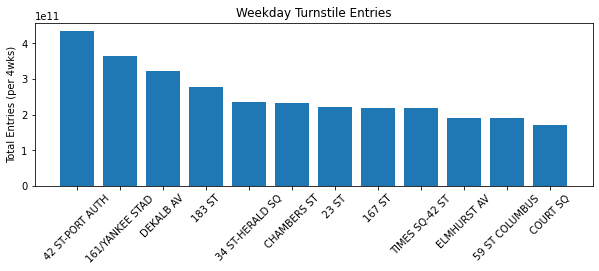

In [13]:
plt.figure(figsize=(10,3))
plt.xticks(rotation=45)
plt.ylabel('Total Entries (per 4wks)')
plt.title('Weekday Turnstile Entries')
plt.bar(weekdayx,weekdayy)
plt.savefig('weekday_plot.png', dpi=300, bbox_inches='tight')

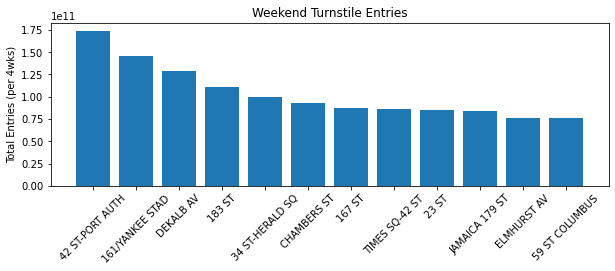

In [14]:
plt.figure(figsize=(10,3))
plt.xticks(rotation=45)
plt.ylabel('Total Entries (per 4wks)')
plt.title('Weekend Turnstile Entries')
plt.bar(weekendx,weekendy)
plt.savefig('weekend_plot.png', dpi=300, bbox_inches='tight')